Data preprocessing complete
X_train shape: (2222, 5)
y_train shape: (2222, 1)
X_val shape: (476, 5)
X_test shape: (477, 5)


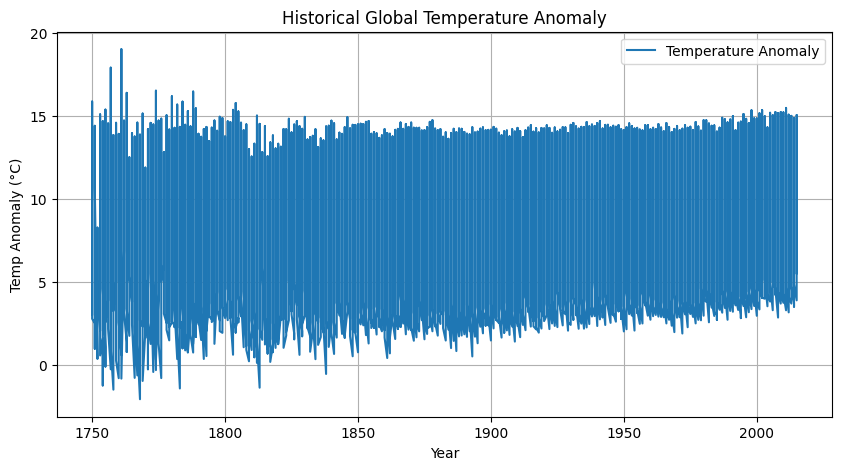

In [5]:
# 01_data_preprocessing.ipynb
# Task 2a & 2b: Dataset loading and data preparation

# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys
import os

# Make sure project root is in path
sys.path.append(os.path.abspath(".."))
from utils.data_loader import load_and_preprocess

# --- Load & preprocess data ---
X_train, X_val, X_test, y_train, y_val, y_test, scaler_X, scaler_y = load_and_preprocess(
    path='../data/raw_data.csv', lags=5
)

print("Data preprocessing complete")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# --- Visualize original data ---
data = pd.read_csv('../data/raw_data.csv')

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Detect date column
if 'dt' in data.columns:
    date_col = 'dt'
else:
    raise KeyError("No date column found in CSV")

# Detect temperature column
if 'LandAverageTemperature' in data.columns:
    temp_col = 'LandAverageTemperature'
else:
    raise KeyError("No temperature column found in CSV")

# Convert date to datetime and extract year
data[date_col] = pd.to_datetime(data[date_col], errors='coerce')
data['Year'] = data[date_col].dt.year

# Keep only relevant columns and drop NaNs
data = data[['Year', temp_col]].dropna()
data.rename(columns={temp_col:'Temp_Anomaly'}, inplace=True)

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Year'], data['Temp_Anomaly'], label='Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Temp Anomaly (°C)')
plt.title('Historical Global Temperature Anomaly')
plt.grid(True)
plt.legend()
plt.show()


In [1]:
import sys
print(sys.executable)


/Users/macbook/Library/CloudStorage/OneDrive-Personal/Ayma/BSc Computer Systems/Computer Control/Individual Project/ClimateChangeAI/venv/bin/python
